## CART-RF-ANN

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion 
Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
# Read data to df variable
df = pd.read_csv("insurance_part2_data.csv")

In [4]:
#display first 5 rows of the data
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.shape

(3000, 10)

There are 3000 observations with 10 features.

In the dataset thier are total 3000 rows and 10 columns variables.

There are no null values in the dataset.

Out of 10 columns, 2 are of type float, 2 are of type int & 6 are of type Object.

Total 9 independent variables and 1 dependent variable 'Claimed'.

In [7]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no NULL values.

In [8]:
df.duplicated().sum()

139

There are 139 duplicate rows. 
We will not remove these duplicate rows for this type of data problem.

In [9]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### From above descriptive statistics , we can say that-

age of customer varies from 8 to 84 years.

Average commision received for tour insurance firm 14.53

50% of data has duration of the tour as 27

Average Amount of sales of tour insurance policies is 60.25

There is a negative value -1 as duration.

-Commision and Sales mean values differ significantly from each other.

In [11]:
# store all numeric columns to df_num

df_num = df[df.dtypes[df.dtypes != 'object'].index]
df_num.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


In [12]:
#Store all categorical variables to df_cat

df_cat = df[df.dtypes[df.dtypes == 'object'].index]
df_cat.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


In [13]:
for i in df_cat.columns:
    print(i.upper(),':',df[i].nunique())
    print(df[i].value_counts())
    print('\n')

AGENCY_CODE : 4
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


TYPE : 2
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


CLAIMED : 2
No     2076
Yes     924
Name: Claimed, dtype: int64


CHANNEL : 2
Online     2954
Offline      46
Name: Channel, dtype: int64


PRODUCT NAME : 5
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


DESTINATION : 3
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64




#### EDA -

Distribution plot for numeric variables

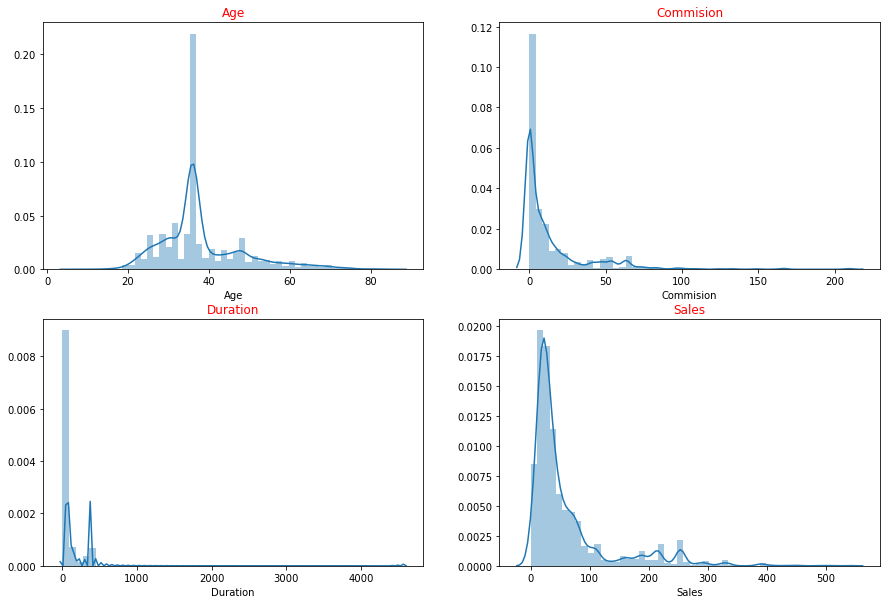

In [14]:
data_plot=df_num
fig=plt.figure(figsize=(15,10))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=True)
    ax.set_title(data_plot.columns[i],color='Red')

All the numeric variables seems to be right skewed

Boxplot for numeric variables-----

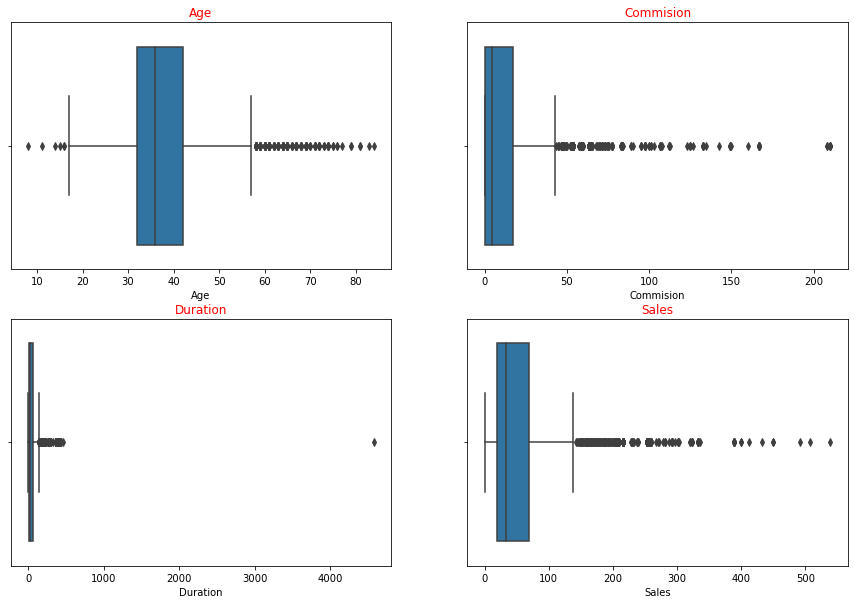

In [15]:
data_plot=df_num
fig=plt.figure(figsize=(15,10))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')

There are outliers in all the variables, but the sales and commision can be a genuine business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.


#### Here Target variable is Claimed.
Lets check the data distribution with respect to target variable Claimed

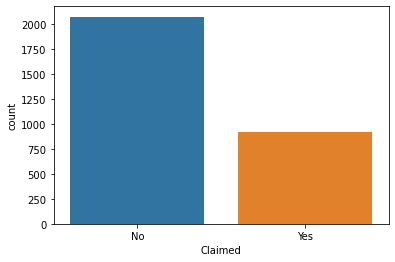

In [16]:
sns.countplot(df['Claimed'])

In [17]:
df['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [18]:
df['Claimed'].value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

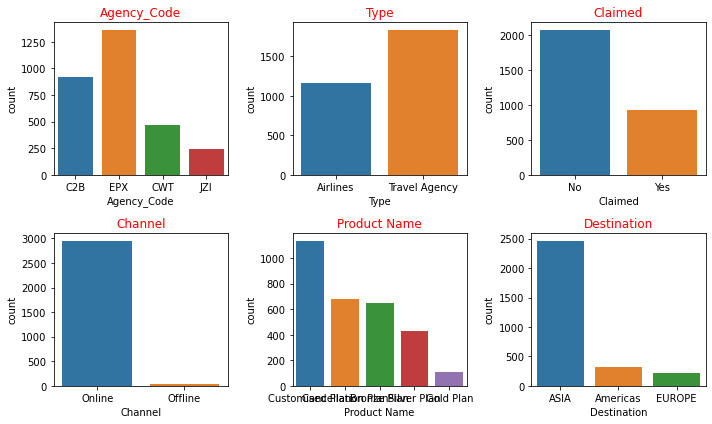

In [19]:
data_plot=df_cat
fig=plt.figure(figsize=(10,6))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')

plt.tight_layout()

-Number of claims are higher for agency code EPX and of type Travel AGency.

-For Asia Destination comapny has received large number of insurance data.

-Maxmimum number of claims are through channel 'Online' and for product 'Customized plan'

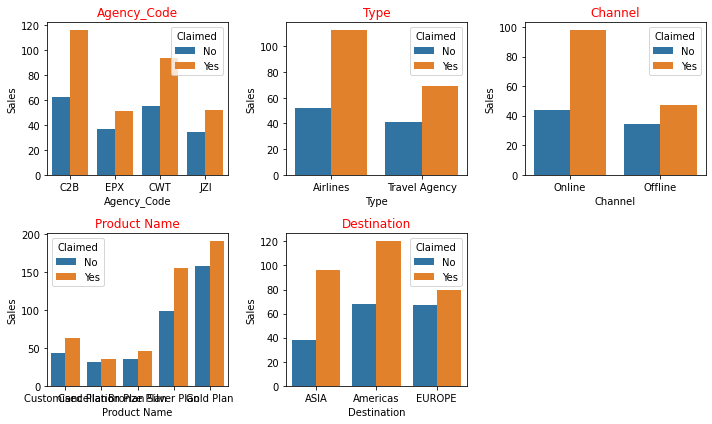

In [20]:
data_plot=df_cat.drop(['Claimed'],axis=1)
fig=plt.figure(figsize=(10,6))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=data_plot[data_plot.columns[i]],y=df['Sales'],hue=df['Claimed'],ci=None)
    ax.set_title(data_plot.columns[i],color='Red')

plt.tight_layout()

-For Airlines Sales value is greater for claimed status.

-Gold plan has higher sales compared to other plans.

-Americas Destinations have higher sales than Asia and Europe.

##### Pair plot and Heat map can be used to do multi-variate analysis and to udnerstand relaitionship among varaiables.

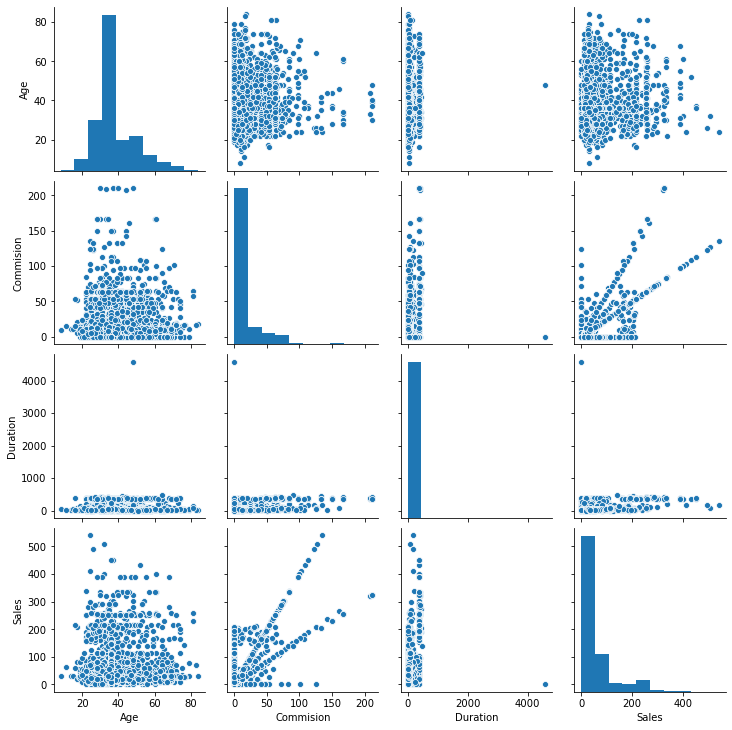

In [21]:
sns.pairplot(data=df)

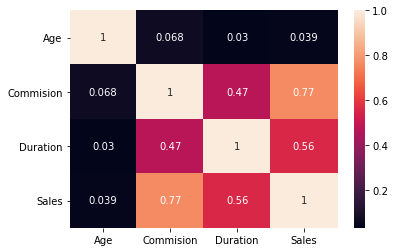

In [22]:
sns.heatmap(df.corr(),annot=True)

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [24]:
#First we need to convert object datatype to numeric codes.

In [25]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [27]:
#now data is converted to all int and float type.

In [28]:
df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

69% data contains claims as '0'

31% data contains claims as '1'

##### We will now split the data into independent variables and dependent variables. 
##### And using these variables we will now create 70% traine data and 30% Test Data with random state 1

In [29]:
x = df.drop('Claimed',axis=1)
y = df.pop('Claimed')

In [30]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

#### Train- Test Data split

In [32]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [33]:
x_train.shape

(2100, 9)

In [34]:
x_test.shape

(900, 9)

# CART- Decision Tree Classifier

In [35]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [36]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [37]:
from sklearn import tree

train_char_label = ['No', 'Yes']
TourInsurance_tree = open('d:\TourInsurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=TourInsurance_tree, feature_names = list(x_train), class_names = list(train_char_label))

TourInsurance_tree.close()

In [38]:
#Observation from graphviz tree


In [39]:
#We will use GridSearchCV to identify bestfit attribute values.

In [40]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30],
    'min_samples_leaf': [20,60,100], 
    'min_samples_split': [60,180,300,400],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [41]:
grid_search_dt.fit(x_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [20, 60, 100],
                         'min_samples_split': [60, 180, 300, 400]})

In [42]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 60,
 'min_samples_split': 180}

In [43]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=60, min_samples_split=180,
                       random_state=1)

In [44]:
dt = grid_search_dt.best_estimator_

In [45]:
ytrain_predict_dt = dt.predict(x_train)
ytest_predict_dt = dt.predict(x_test)

In [46]:
ytrain_predict_dt_prob = dt.predict_proba(x_train)
ytest_predict_dt_prob = dt.predict_proba(x_test)

In [47]:
ytrain_predict_dt_prob

array([[0.96923077, 0.03076923],
       [0.68047337, 0.31952663],
       [0.25      , 0.75      ],
       ...,
       [0.68047337, 0.31952663],
       [0.88405797, 0.11594203],
       [0.48022599, 0.51977401]])

In [48]:
ytrain_predict_dt_prob

array([[0.96923077, 0.03076923],
       [0.68047337, 0.31952663],
       [0.25      , 0.75      ],
       ...,
       [0.68047337, 0.31952663],
       [0.88405797, 0.11594203],
       [0.48022599, 0.51977401]])

In [49]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.612617
Sales         0.261442
Product Name  0.057805
Duration      0.040785
Age           0.019771
Type          0.007580
Commision     0.000000
Channel       0.000000
Destination   0.000000


# Random Forest

param_grid_rfcl = {
    'max_depth': [7,8],
    'max_features': [4,5,6],
    'min_samples_leaf': [5,6,7], 
    'min_samples_split': [30,50],
    'n_estimators': [350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [50]:
param_grid_rfcl = {
    'max_depth': [6],
    'max_features': [3],
    'min_samples_leaf': [8], 
    'min_samples_split': [46],
    'n_estimators': [350]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [51]:
grid_search_rfcl.fit(x_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6], 'max_features': [3],
                         'min_samples_leaf': [8], 'min_samples_split': [46],
                         'n_estimators': [350]})

In [52]:
grid_search_rfcl.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 46,
 'n_estimators': 350}

In [53]:
rfcl = grid_search_rfcl.best_estimator_

In [54]:
ytrain_predict_rfcl = rfcl.predict(x_train)
ytest_predict_rfcl = rfcl.predict(x_test)

In [55]:
ytrain_predict_rfcl_prob = rfcl.predict_proba(x_train)
ytest_predict_rfcl_prob = rfcl.predict_proba(x_test)

In [56]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.263989
Product Name  0.219047
Sales         0.161785
Commision     0.143733
Type          0.076743
Duration      0.075790
Age           0.048086
Destination   0.009889
Channel       0.000937


# ANN

In [57]:
# scaling is necessity for ANN

In [58]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()


In [59]:
x_trains = z.fit_transform(x_train)

In [60]:
x_trains.shape

(2100, 9)

In [61]:
x_tests = z.transform(x_test)

In [62]:
x_tests.shape

(900, 9)

In [63]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [64]:
grid_search_nncl.fit(x_trains,train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.01]})

In [65]:
grid_search_nncl.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [66]:
nncl = grid_search_nncl.best_estimator_

In [67]:
ytrain_predict_nncl = nncl.predict(x_trains)
ytest_predict_nncl = nncl.predict(x_tests)

In [68]:
ytrain_predict_nncl_prob = nncl.predict_proba(x_train)
ytest_predict_nncl_prob = nncl.predict_proba(x_test)

In [102]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.263989
Product Name  0.219047
Sales         0.161785
Commision     0.143733
Type          0.076743
Duration      0.075790
Age           0.048086
Destination   0.009889
Channel       0.000937


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

### CART

#### Classification report

In [69]:
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [70]:
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



#### Confusion Matrix

In [71]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[1293,  178],
       [ 269,  360]], dtype=int64)

In [72]:
confusion_matrix(test_labels, ytest_predict_dt)

array([[551,  54],
       [152, 143]], dtype=int64)

#### AUC_ROC Curve

AUC: 0.834


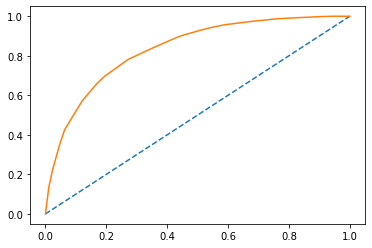

In [73]:

# predict probabilities
probs_dt = dt.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]

# calculate AUC
dt_train_auc = roc_auc_score(train_labels, probs_dt)
print('AUC: %.3f' % dt_train_auc)

# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(train_labels, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr)

AUC: 0.800


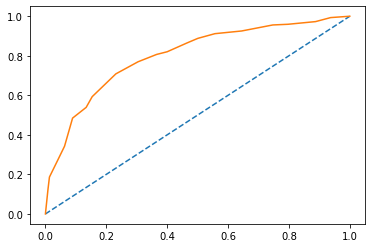

In [74]:

# predict probabilities
probs_dt = dt.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]

# calculate AUC
dt_test_auc = roc_auc_score(test_labels, probs_dt)
print('AUC: %.3f' % dt_test_auc)

# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(test_labels, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr)

#### Accurancy score

In [75]:
dt_train_acc=dt.score(x_train,train_labels) 
dt_train_acc

0.7871428571428571

In [76]:
dt_test_acc=dt.score(x_test,test_labels) 
dt_test_acc

0.7711111111111111

### Other evaluation parameters

In [77]:
dt_metrics=classification_report(train_labels, ytrain_predict_dt,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_train_precision=round(df.loc["1"][0],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_f1=round(df.loc["1"][2],2)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_precision  0.67
dt_train_recall  0.57
dt_train_f1  0.62


In [78]:
dt_metrics=classification_report(test_labels, ytest_predict_dt,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_precision  0.73
dt_test_recall  0.48
dt_test_f1  0.58


### Random Forests

##### Classification report

In [79]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.73      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [80]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



##### Confusion matriix

In [81]:
print(confusion_matrix(train_labels,ytrain_predict_rfcl))

[[1331  140]
 [ 258  371]]


In [82]:
print(confusion_matrix(test_labels,ytest_predict_rfcl))

[[555  50]
 [154 141]]


#### AUC_ROC curve

AUC: 0.853


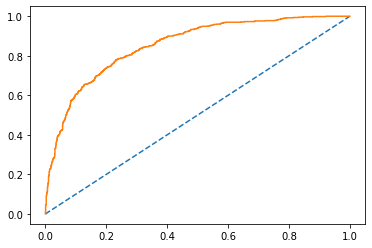

In [83]:
# predict probabilities
probs_rfcl = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_rfcl = probs_rfcl[:, 1]

# calculate AUC
rfcl_train_auc = roc_auc_score(train_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_train_auc)

# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr)

AUC: 0.820


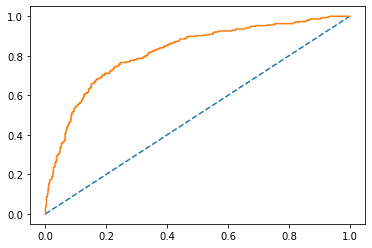

In [84]:
# predict probabilities
probs_rfcl = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_rfcl = probs_rfcl[:, 1]

# calculate AUC
rfcl_test_auc = roc_auc_score(test_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_test_auc)

# calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_labels, probs_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr)

#### Accuracy calculation

In [85]:
rfcl_train_acc=rfcl.score(x_train,train_labels) 
rfcl_train_acc

0.8104761904761905

In [86]:
rfcl_test_acc=rfcl.score(x_test,test_labels) 
rfcl_test_acc

0.7733333333333333

In [87]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.59
rf_train_f1  0.65


In [88]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.48
rf_test_f1  0.58


### ANN

#### Classfication report

In [89]:
 print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.67      0.51      0.57       629

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [90]:
 print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



#### Confusion matrix 

In [91]:
 print(confusion_matrix(train_labels,ytrain_predict_nncl))

[[1311  160]
 [ 311  318]]


In [92]:
 print(confusion_matrix(test_labels,ytest_predict_nncl))

[[556  49]
 [167 128]]


#### AUC_ROC Curve

AUC: 0.818


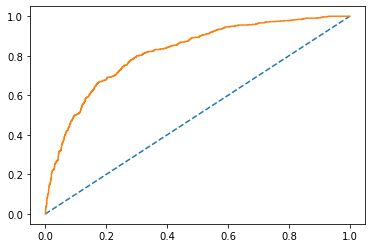

In [93]:
# predict probabilities
probs_nncl = nncl.predict_proba(x_trains)
# keep probabilities for the positive outcome only
probs_nncl = probs_nncl[:, 1]

# calculate AUC
nncl_train_auc = roc_auc_score(train_labels, probs_nncl)
print('AUC: %.3f' % nncl_train_auc)

# calculate roc curve
nncl_train_fpr, nncl_train_tpr, nncl_train_thresholds = roc_curve(train_labels, probs_nncl)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(nncl_train_fpr, nncl_train_tpr)

AUC: 0.804


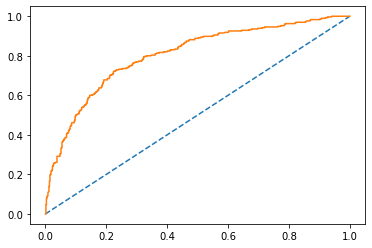

In [94]:
# predict probabilities
probs_nncl = nncl.predict_proba(x_tests)
# keep probabilities for the positive outcome only
probs_nncl = probs_nncl[:, 1]

# calculate AUC
nncl_test_auc = roc_auc_score(test_labels, probs_nncl)
print('AUC: %.3f' % nncl_test_auc)

# calculate roc curve
nncl_test_fpr, nncl_test_tpr, nncl_test_thresholds = roc_curve(test_labels, probs_nncl)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(nncl_test_fpr, nncl_test_tpr)

In [95]:
nncl_train_acc=nncl.score(x_trains,train_labels) 
nncl_train_acc

0.7757142857142857

In [96]:
nncl_test_acc=nncl.score(x_tests,test_labels) 
nncl_test_acc

0.76

In [97]:
nncl_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_train_precision=round(df.loc["1"][0],2)
nncl_train_recall=round(df.loc["1"][1],2)
nncl_train_f1=round(df.loc["1"][2],2)
print ('nncl_train_precision ',nncl_train_precision)
print ('nncl_train_recall ',nncl_train_recall)
print ('nncl_train_f1 ',nncl_train_f1)

nncl_train_precision  0.67
nncl_train_recall  0.51
nncl_train_f1  0.57


In [98]:
nncl_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_test_precision=round(df.loc["1"][0],2)
nncl_test_recall=round(df.loc["1"][1],2)
nncl_test_f1=round(df.loc["1"][2],2)
print ('nncl_test_precision ',nncl_test_precision)
print ('nncl_test_recall ',nncl_test_recall)
print ('nncl_test_f1 ',nncl_test_f1)

nncl_test_precision  0.72
nncl_test_recall  0.43
nncl_test_f1  0.54


# Summary:

In [99]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'CART Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'CART Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nncl_train_acc,nncl_train_auc,nncl_train_recall,nncl_train_precision,nncl_train_f1],
        'Neural Network Test':[nncl_test_acc,nncl_test_auc,nncl_test_recall,nncl_test_precision,nncl_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.81,0.77,0.78,0.76
AUC,0.83,0.80,0.85,0.82,0.82,0.80
Recall,0.57,0.48,0.59,0.48,0.51,0.43
Precision,0.67,0.73,0.73,0.74,0.67,0.72
F1 Score,0.62,0.58,0.65,0.58,0.57,0.54


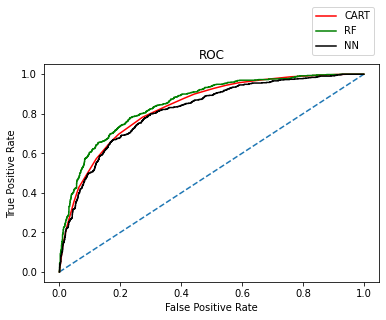

In [100]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr,color='red',label="CART")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RF")
plt.plot(nncl_train_fpr,nncl_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

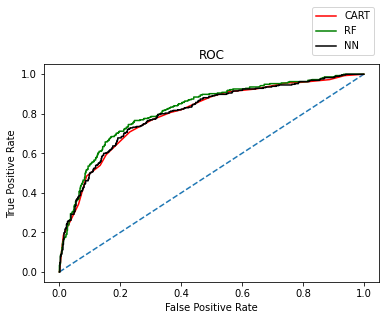

In [101]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_test_fpr, dt_test_tpr,color='red',label="CART")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RF")
plt.plot(nncl_test_fpr,nncl_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable Agency Code is found to be the most useful feature amongst all other features for predicting. 

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate
if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.